In [31]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import gaussian_process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ExpSineSquared, ConstantKernel as C
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
import sklearn.decomposition
import sklearn.metrics
%matplotlib inline

In [32]:
dataset = pd.read_csv('./Weather.csv', dtype={"Snowfall":object, "PoorWeather":object, "SNF": object, "TSHDSBRSGF":object})

In [33]:
dataset['Precip'] = pd.to_numeric(dataset['Precip'], errors='coerce')                                
dataset = dataset.fillna(0)
dataset.shape

(119040, 31)

In [34]:
dataset.describe()

,STA,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,...,119040.0,119040.0,119040.0,119040.0,119040.000000,119040.0,119040.0,119040.0,119040.0,119040.0
mean,29659.435795,3.225612,0.168818,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,0.120884,...,0.0,0.0,0.0,0.0,0.053300,0.0,0.0,0.0,0.0,0.0
std,20953.209402,10.801044,2.611819,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,2.069915,...,0.0,0.0,0.0,0.0,0.886512,0.0,0.0,0.0,0.0,0.0
min,10001.000000,0.000000,0.000000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11801.000000,0.000000,0.000000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
50%,22508.000000,0.000000,0.000000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
75%,33501.000000,0.762000,0.000000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
max,82506.000000,307.340000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,...,0.0,0.0,0.0,0.0,23.900000,0.0,0.0,0.0,0.0,0.0


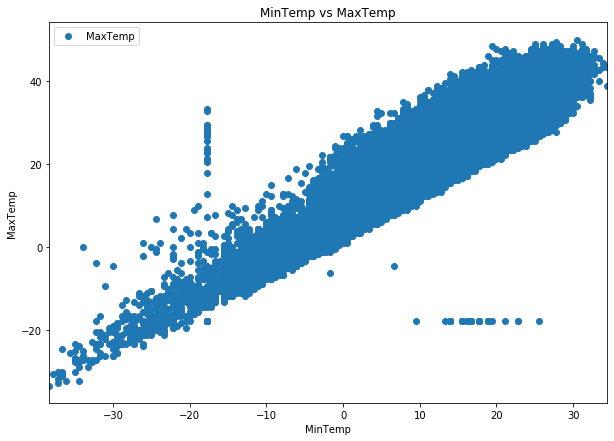

In [35]:
df = dataset[['MinTemp','MaxTemp']]
df.plot(x='MinTemp', y='MaxTemp', style='o',figsize=(10,7))
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [36]:
#prepare data, sort by minimal temperature and turn X,y into a function
df = dataset[['MinTemp','Precip','MaxTemp']]
#just take the first 1000 values - the full dataset takes way too much memory
#X = dfs['MinTemp'].head(1000).values.reshape(-1,1)
#y = dfs['MaxTemp'].head(1000).values.reshape(-1,1)
X = df.values[:,0:-1]
y = df.values[:,1]
X_train = df.head(1000).values[:,0:-1]
y_train = df.head(1000).values[:,1]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train)

[[22.22222222  1.016     ]
 [21.66666667  0.        ]
 [22.22222222  2.54      ]
 ...
 [24.44444444  0.        ]
 [25.          0.        ]
 [25.55555556  0.        ]]


In [37]:
np.random.seed(1)

#Predict max temp from min temp and precipitation
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
#kernel = C(1.0, (1e-3, 1e3)) * ExpSineSquared()
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

gp.fit(X_train, y_train)

print (gp.score(X_train, y_train))

y_pred, sigma = gp.predict(X, return_std=True)

/home/markus/.local/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 8.74023438e-02, -7.62868326e-24]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 146, 'nit': 9, 'warnflag': 2}
  " state: %s" % convergence_dict)


1.0


/home/markus/.local/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [38]:
print (X[:,1].shape)
dfnew = pd.DataFrame({'MinTemp': X[:,0], 'Precip': X[:,1], 'MaxTemp': y[:], 'MaxPred': y_pred})
#dfnew = pd.DataFrame({ 'MaxTemp': y.reshape(len(y),), 'MaxPred': y_pred.reshape(len(y_pred),)})
y_predT, sigma = gp.predict(X_train, return_std=True)
#print (sigma)

(119040,)


/home/markus/.local/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


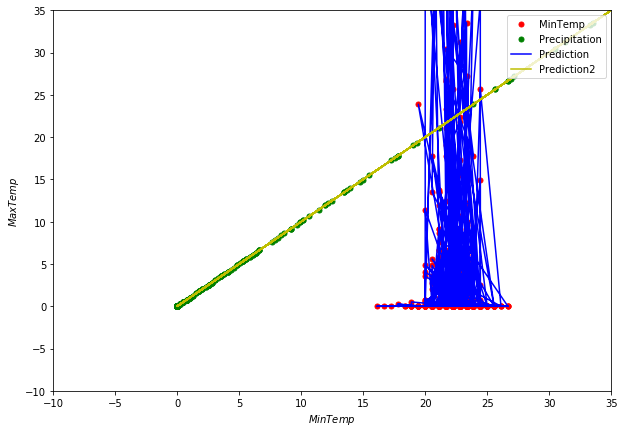

In [50]:
# Oje oje - far off the mark
# Gaussian doesn't like values below 0 !!!
plt.figure(figsize=[10,7])

plt.plot(X_train[:,0], y_train, 'r.', markersize=10, label='MinTemp')
plt.plot(X_train[:,1], y_train, 'g.', markersize=10, label='Precipitation')
plt.plot(X_train[:,0], y_predT, 'b-', label='Prediction')
plt.plot(X_train[:,1], y_train, 'y-', markersize=10, label='Prediction2')
#plt.fill(np.concatenate([X, X[::-1]]),
#         np.concatenate([y_pred - 1.9600 * sigma,
#                       (y_pred + 1.9600 * sigma)[::-1]]),
#         alpha=.5, fc='b', ec='None')
#         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$MinTemp$')
plt.ylabel('$MaxTemp$')
plt.ylim(-10, 35)
plt.xlim(-10, 35)
plt.legend(loc='upper right')

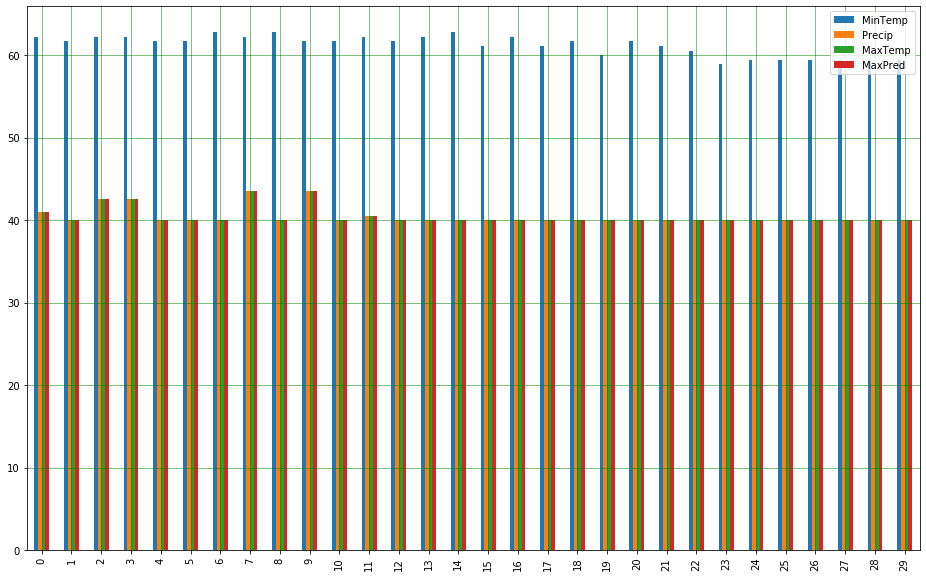

In [54]:
df1 = dfnew.head(30) + 40
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

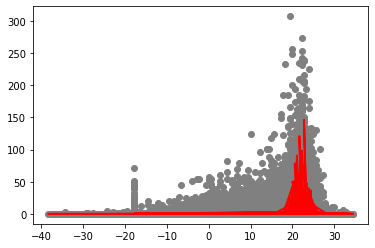

In [59]:
plt.scatter(X[:,0], y,  color='gray')
plt.plot(X[:,0], y_pred, color='red', linewidth=2)
plt.show()